<a href="https://colab.research.google.com/github/rubai5995-ai/Student-performance-Prediction-_Rubai_2202028/blob/main/student_performance_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
dataset=pd.read_csv('/content/spp.csv')
dataset.head()

,StudentID,Name,Gender,AttendanceRate,StudyHoursPerWeek,PreviousGrade,ExtracurricularActivities,ParentalSupport,FinalGrade,Study Hours,Attendance (%),Online Classes Taken
0,1.0,John,Male,85.0,15.0,78.0,1.0,High,80.0,4.8,59.0,False
1,2.0,Sarah,Female,90.0,20.0,85.0,2.0,Medium,87.0,2.2,70.0,True
2,3.0,Alex,Male,78.0,10.0,65.0,0.0,Low,68.0,4.6,92.0,False
3,4.0,Michael,Male,92.0,25.0,90.0,3.0,High,92.0,2.9,96.0,False
4,5.0,Emma,Female,NaN,18.0,82.0,2.0,Medium,85.0,4.1,97.0,True


In [2]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   StudentID                  960 non-null    float64
 1   Name                       966 non-null    object 
 2   Gender                     952 non-null    object 
 3   AttendanceRate             960 non-null    float64
 4   StudyHoursPerWeek          950 non-null    float64
 5   PreviousGrade              967 non-null    float64
 6   ExtracurricularActivities  957 non-null    float64
 7   ParentalSupport            978 non-null    object 
 8   FinalGrade                 960 non-null    float64
 9   Study Hours                976 non-null    float64
 10  Attendance (%)             959 non-null    float64
 11  Online Classes Taken       975 non-null    object 
dtypes: float64(8), object(4)
memory usage: 93.9+ KB


In [16]:
dataset['Name']=dataset.Name.fillna(dataset.Name.mode()[0])
dataset['AttendanceRate']=dataset.AttendanceRate.fillna(dataset.AttendanceRate.mode()[0])
dataset['StudyHoursPerWeek']=dataset.StudyHoursPerWeek.fillna(dataset.StudyHoursPerWeek.mode()[0])
dataset['PreviousGrade']=dataset.PreviousGrade.fillna(dataset.PreviousGrade.mode()[0])
dataset['ExtracurricularActivities']=dataset.ExtracurricularActivities.fillna(dataset.ExtracurricularActivities.mode()[0])
dataset['FinalGrade']=dataset.FinalGrade.fillna(dataset.FinalGrade.mode()[0])
dataset['Study Hours']=dataset['Study Hours'].fillna(dataset['Study Hours'].mean())
dataset['Attendance (%)']=dataset['Attendance (%)'].fillna(dataset['Attendance (%)'].mean())




In [12]:
dataset['StudentID']=dataset.StudentID.fillna(dataset.StudentID.mode()[0])
dataset['Gender']=dataset.Gender.fillna(dataset.Gender.mode()[0])
dataset['ParentalSupport']=dataset.ParentalSupport.fillna(dataset.ParentalSupport.mode()[0])
dataset['Online Classes Taken']=dataset['Online Classes Taken'].fillna(dataset['Online Classes Taken'].mean())


In [19]:
from sklearn.preprocessing import LabelEncoder
lb=LabelEncoder()
dataset['Name']=lb.fit_transform(dataset.Name)
dataset['Gender']=lb.fit_transform(dataset.Gender)
dataset['ParentalSupport']=lb.fit_transform(dataset.ParentalSupport)
dataset['Name']=lb.fit_transform(dataset.Name)
dataset['Online Classes Taken']=lb.fit_transform(dataset['Online Classes Taken'])



In [20]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   StudentID                  1000 non-null   float64
 1   Name                       1000 non-null   int64  
 2   Gender                     1000 non-null   int64  
 3   AttendanceRate             1000 non-null   float64
 4   StudyHoursPerWeek          1000 non-null   float64
 5   PreviousGrade              1000 non-null   float64
 6   ExtracurricularActivities  1000 non-null   float64
 7   ParentalSupport            1000 non-null   int64  
 8   FinalGrade                 1000 non-null   float64
 9   Study Hours                1000 non-null   float64
 10  Attendance (%)             1000 non-null   float64
 11  Online Classes Taken       1000 non-null   int64  
dtypes: float64(8), int64(4)
memory usage: 93.9 KB


In [21]:
dataset.describe()

,StudentID,Name,Gender,AttendanceRate,StudyHoursPerWeek,PreviousGrade,ExtracurricularActivities,ParentalSupport,FinalGrade,Study Hours,Attendance (%),Online Classes Taken
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,5269.179000,464.681000,0.549000,85.490000,17.749000,77.01800,1.498000,0.961000,79.709000,2.406967,77.248175,1.015000
std,2697.853629,284.410472,0.497842,7.184533,6.134952,10.33046,1.029104,0.833171,9.433945,1.600686,18.897991,0.987801
min,1.000000,0.000000,0.000000,70.000000,8.000000,60.00000,0.000000,0.000000,62.000000,-5.000000,50.000000,0.000000
25%,2836.750000,213.750000,0.000000,82.000000,12.000000,65.00000,1.000000,0.000000,72.000000,1.200000,64.000000,0.000000
50%,5162.500000,462.500000,1.000000,85.000000,18.000000,78.00000,1.000000,1.000000,80.000000,2.453484,77.000000,1.000000
75%,7667.500000,711.250000,1.000000,91.000000,22.000000,86.00000,2.000000,2.000000,88.000000,3.700000,89.000000,2.000000
max,9998.000000,961.000000,1.000000,95.000000,30.000000,90.00000,3.000000,2.000000,92.000000,5.000000,200.000000,2.000000


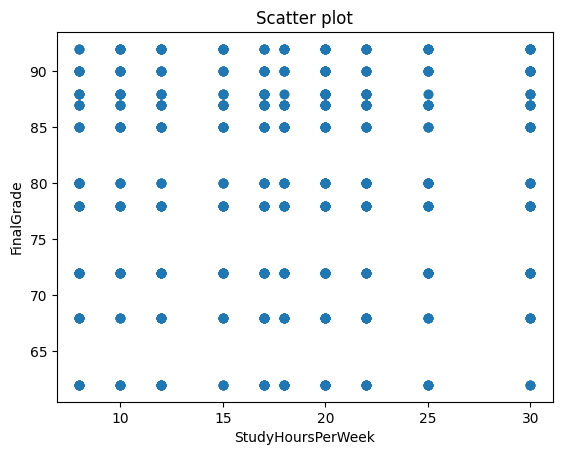

In [25]:
import matplotlib.pyplot as plt
plt.scatter(dataset['StudyHoursPerWeek'], dataset['FinalGrade'])
plt.title("Scatter plot")
plt.xlabel("StudyHoursPerWeek")
plt.ylabel("FinalGrade")
plt.show();

In [26]:
x = dataset.drop(columns = ['StudyHoursPerWeek'])
y = dataset['StudyHoursPerWeek']

In [27]:
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(
    x,y, random_state=42, test_size= 0.2
)


In [28]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(xtrain,ytrain)
lr.score(xtest,ytest)


-0.030320209738788684

In [37]:
from sklearn.metrics import mean_squared_error as mse
predicted = lr.predict(xtest)
error = mse(ytest, predicted) ** .5
print(error)


6.199184441927973


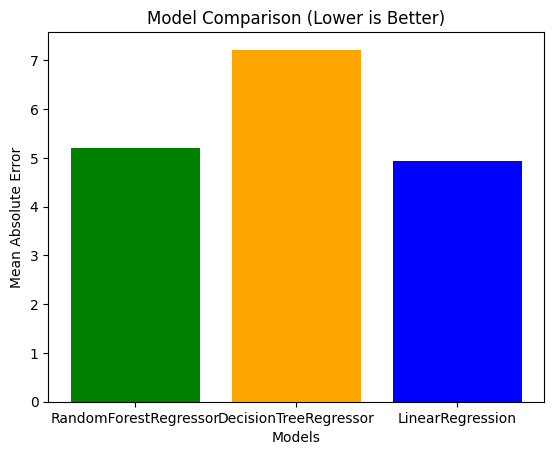

In [34]:
from sklearn.metrics import mean_absolute_error

errors = {}
for model in models:
    model.fit(xtrain, ytrain)
    name = type(model).__name__
    ypred = model.predict(xtest)
    mae = mean_absolute_error(ytest, ypred)   # always positive
    errors[name] = mae

# Plot MAE (lower is better)
plt.bar(errors.keys(), errors.values(), color=['green', 'orange', 'blue'])
plt.xlabel("Models")
plt.ylabel("Mean Absolute Error")
plt.title("Model Comparison (Lower is Better)")
plt.show()


In [35]:
errors

{'RandomForestRegressor': 5.21095,
 'DecisionTreeRegressor': 7.22,
 'LinearRegression': 4.941476074874257}

<BarContainer object of 3 artists>

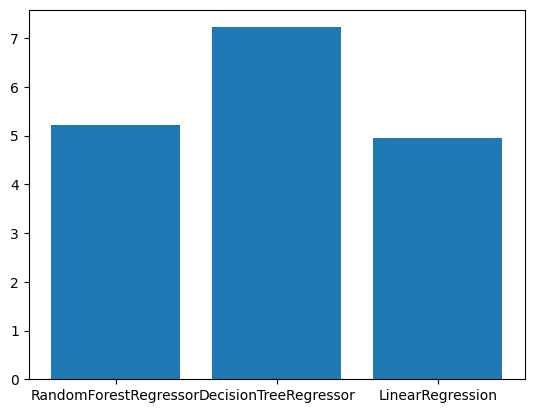

In [36]:
import matplotlib.pyplot as plt

plt.bar(errors.keys(),errors.values())
